In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch
import sklearn.metrics as mt
import pandas as pd

In [2]:
embedding_mirna = torch.load('/root/MVCMDA/embedding_x.pt').cpu().numpy()
embedding_drug = torch.load('/root/MVCMDA/embedding_y.pt').cpu().numpy()
print(embedding_mirna.shape)
print(embedding_drug.shape)

(1043, 64)
(2166, 64)


In [3]:
embeddings = np.concatenate((embedding_mirna, embedding_drug), axis=0)
embeddings.shape

(3209, 64)

In [4]:
mirna_indices = np.arange(1043)
drug_indices = np.arange(1043,1043+2166)

print(mirna_indices.shape,mirna_indices[0:10])
print(drug_indices.shape, drug_indices[0:10])

(1043,) [0 1 2 3 4 5 6 7 8 9]
(2166,) [1043 1044 1045 1046 1047 1048 1049 1050 1051 1052]


In [5]:
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(embeddings)

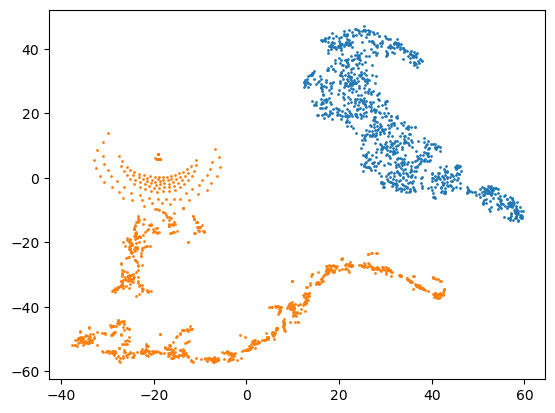

In [6]:
# 可视化结果
plt.scatter(embedded_data[mirna_indices, 0], embedded_data[mirna_indices, 1], s = 1, label='miRNA')
plt.scatter(embedded_data[drug_indices, 0], embedded_data[drug_indices, 1], s = 1, label='Drug')

In [7]:
related_nodes = np.loadtxt("/root/MVCMDA/datasets/data(MDA108)/Graph_edge_list.txt", dtype=int)

print(related_nodes.shape)

(1430, 2)


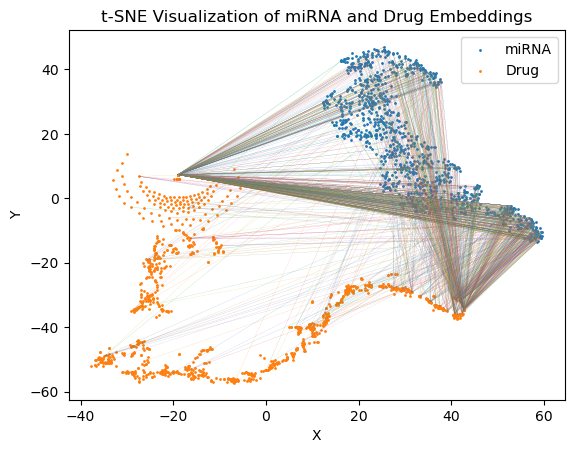

In [8]:
# width = 200
# height = 200
# dpi = 100
# plt.figure(figsize=(width, height), dpi=dpi)


for x, y in related_nodes:
    y = y + 1043
    plt.plot([embedded_data[x, 0], embedded_data[y, 0]], \
              [embedded_data[x, 1], embedded_data[y, 1]],\
                '--', lw = 0.1)
    
plt.scatter(embedded_data[mirna_indices, 0], embedded_data[mirna_indices, 1], s = 1, label='miRNA')
plt.scatter(embedded_data[drug_indices, 0], embedded_data[drug_indices, 1], s = 1, label='Drug')  

# 设置图例和标题
plt.legend()
plt.title('t-SNE Visualization of miRNA and Drug Embeddings')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

# plt.savefig('embedding_visual.png', dpi=600, bbox_inches='tight')


In [9]:
def AU_ROC(label, pred):
    fpr, tpr, thresholds = mt.roc_curve(label, pred, pos_label=1)
    roc_auc = mt.auc(fpr, tpr)

    best_idx = np.argmax(tpr - fpr)
    best_threshold = thresholds[best_idx]
    # print(best_threshold)
    return roc_auc, best_threshold

In [10]:
score = embedding_mirna@embedding_drug.T
label = pd.read_csv("/root/MVCMDA/datasets/data(MDA108)/m-d.csv",delimiter=',',header=None).values

print(score.shape)
print(label.shape)

auc, best_threshold = AU_ROC(label.flatten(), score.flatten())
print(auc, best_threshold)

preds = (score >= best_threshold).astype(int)
print(preds.shape)


related_nodes = []
for i in range(1043):
    for j in range(2166):
        if preds[i,j] == 1:
            related_nodes.append([i,j])

print(len(related_nodes))

(1043, 2166)
(1043, 2166)
0.9329043584098491 0.03529865
(1043, 2166)
423241


In [18]:
sorted_indices = np.argsort(score, axis=None)[::-1]
top_indices = np.unravel_index(sorted_indices[:2000], score.shape)
row_indices, col_indices = top_indices
print(row_indices.shape, col_indices.shape)

(2000,) (2000,)


In [ ]:
total_elements = 1043*2166

# 随机选择1502个索引
random_indices = np.random.choice(total_elements, size=1502, replace=False)

# 将一维索引转换为二维坐标
row_indices, col_indices = np.unravel_index(random_indices, score.shape)

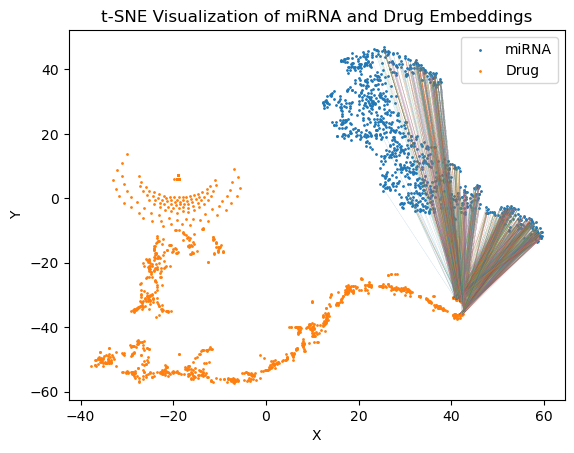

In [19]:
for x, y in zip(topx, topy):
    y = y + 1043
    plt.plot([embedded_data[x, 0], embedded_data[y, 0]], \
              [embedded_data[x, 1], embedded_data[y, 1]],\
                '--', lw = 0.1)
    
plt.scatter(embedded_data[mirna_indices, 0], embedded_data[mirna_indices, 1], s = 1, label='miRNA')
plt.scatter(embedded_data[drug_indices, 0], embedded_data[drug_indices, 1], s = 1, label='Drug')  

# 设置图例和标题
plt.legend()
plt.title('t-SNE Visualization of miRNA and Drug Embeddings')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()